In [20]:
import grid2op
import os

In [21]:
os.chdir("../dist/")
%pip install plan4grid-0.0.1-py3-none-any.whl

Processing d:\aiplan4grid\dist\plan4grid-0.0.1-py3-none-any.whl
plan4grid is already installed with the same version as the provided wheel. Use --force-reinstall to force an installation of the wheel.
Note: you may need to restart the kernel to use updated packages.


In [22]:
from plan4grid.AIPlan4GridAgent import AIPlan4GridAgent
from grid2op.Backend import PandaPowerBackend

In [23]:
env_name = "educ_case14_storage"
operational_horizon = 1
strategic_horizon = 288
solver = "enhsp"
scenario_id = 5

In [24]:
env = grid2op.make(dataset=env_name, test=True, backend=PandaPowerBackend())
agent = AIPlan4GridAgent(
    env=env,
    scenario_id=scenario_id,
    operational_horizon=operational_horizon,
    solver=solver,
    debug=True,
)

d:\AIPlan4Grid\.venv\lib\site-packages\grid2op\MakeEnv\Make.py:420: UserWarning: You are using a development environment. This environment is not intended for training agents. It might not be up to date and its primary use if for tests (hence the "test=True" you passed as argument). Use at your own risk.
  warnings.warn(_MAKE_DEV_ENV_WARN)


For do nothing: 
	 scenario: 2019-01-17: 234 / 288
	 cumulated reward: 3546.45


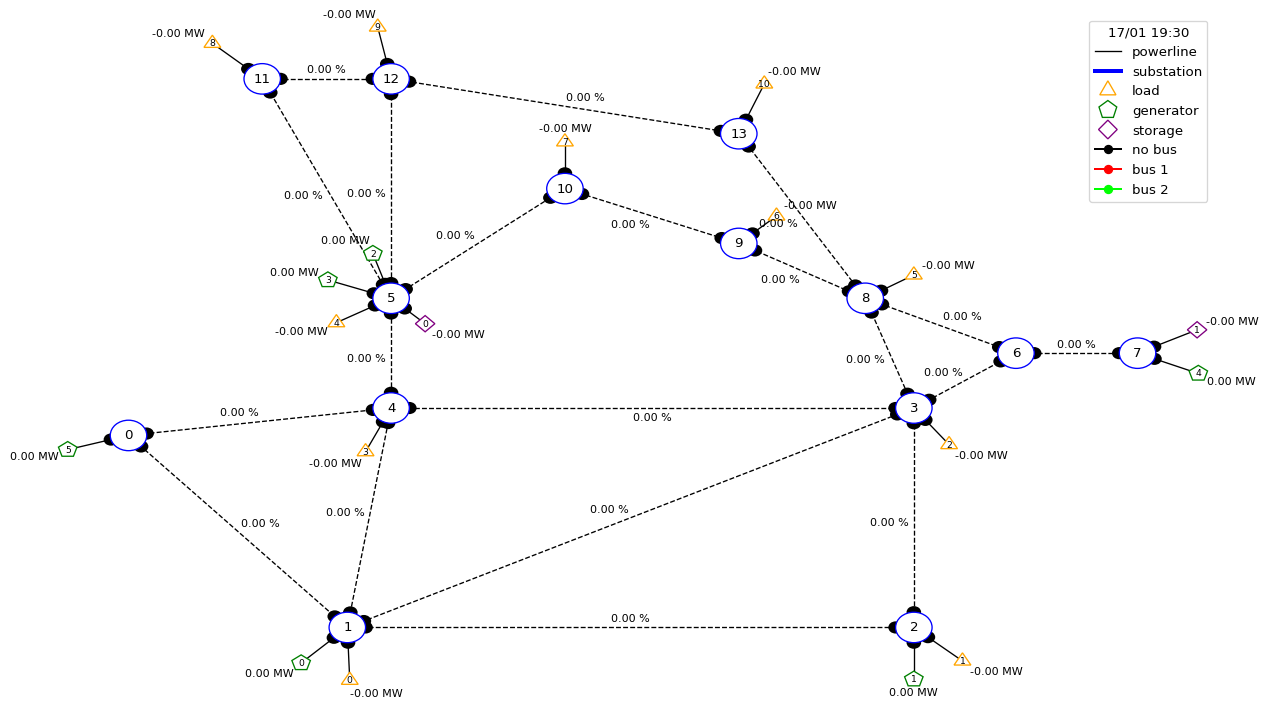

In [25]:
from grid2op.PlotGrid import PlotMatplot
plot_helper = PlotMatplot(env.observation_space)
print("For do nothing: ")
env.set_id(scenario_id)
obs = env.reset()
done = False
all_obs = []
cum_reward = 0
for nb_step in range(strategic_horizon):
    obs, reward, done, info = env.step(env.action_space({}))
    cum_reward += reward
    all_obs.append(obs)
    if done and nb_step != (strategic_horizon-1):
        break
print(f"\t scenario: {os.path.split(env.chronics_handler.get_id())[-1]}: {nb_step + 1} / {strategic_horizon}")
print(f"\t cumulated reward: {cum_reward:.2f}")
last_obs = all_obs[-1]
_ = plot_helper.plot_obs(last_obs)


* Episode 0:
	No congestion and no topology change detected, no need to solve UP problem.
	Reward: 14.078968048095703

* Episode 1:
	No congestion and no topology change detected, no need to solve UP problem.
	Reward: 15.342342376708984

* Episode 2:
	No congestion and no topology change detected, no need to solve UP problem.
	Reward: 15.515480041503906

* Episode 3:
	No congestion and no topology change detected, no need to solve UP problem.
	Reward: 15.462727546691895

* Episode 4:
	No congestion and no topology change detected, no need to solve UP problem.
	Reward: 14.859338760375977

* Episode 5:
	No congestion and no topology change detected, no need to solve UP problem.
	Reward: 14.788910865783691

* Episode 6:
	No congestion and no topology change detected, no need to solve UP problem.
	Reward: 15.35770320892334

* Episode 7:
	No congestion and no topology change detected, no need to solve UP problem.
	Reward: 14.078968048095703

* Episode 8:
	No congestion and no topology chan

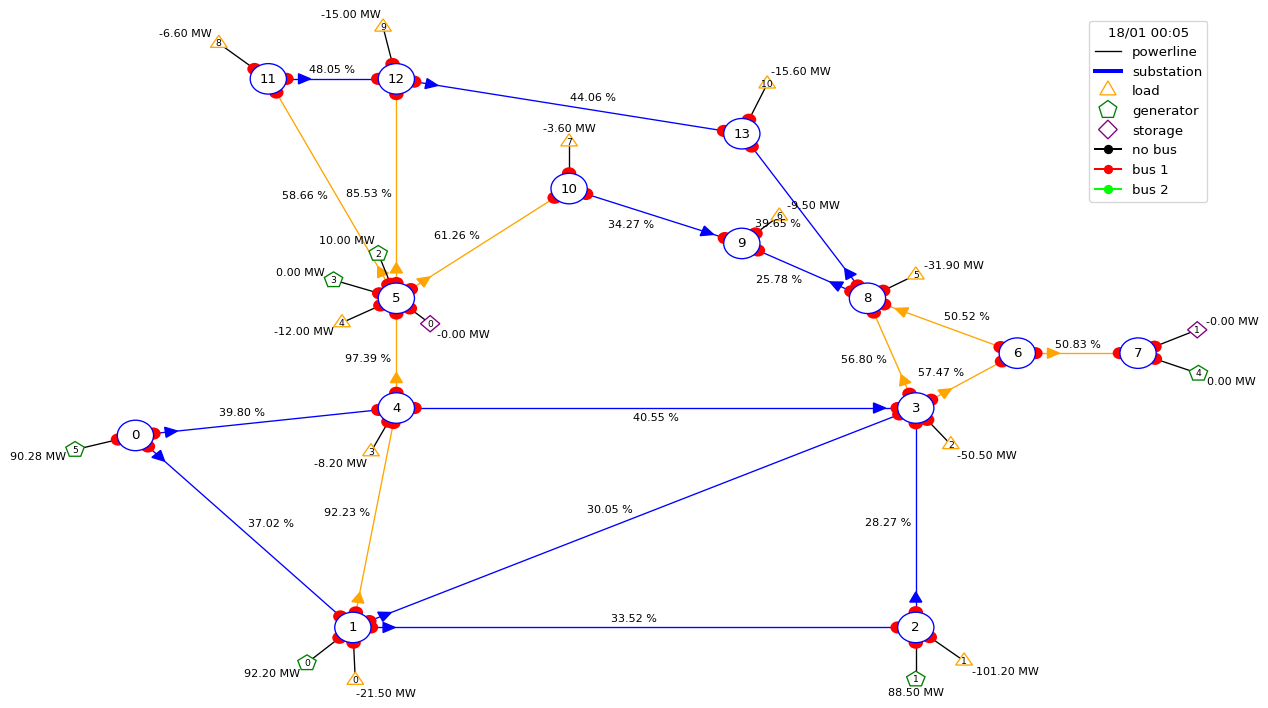


Cumulative reward: 4335.703272819519


In [26]:
cumulative_reward = 0
for i in range(strategic_horizon):
    print(f"\n* Episode {i}:")
    obs, reward, done, *_ = agent.progress(i)
    print(f"\tReward: {reward}")
    cumulative_reward += reward
    if done and i != (strategic_horizon - 1):
        print("The episode is done before the end of the strategic horizon!")
        break
agent.display_grid()
print(f"\nCumulative reward: {cumulative_reward}")